In [24]:
# Importing necessary libraries for plotting

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
from scipy.stats import f_oneway


In [7]:
# Import and preview dataset

data = pd.read_csv(r'student_data_raw.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4,at_home,teacher,...,4,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1,at_home,other,...,5,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1,at_home,other,...,4,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2,health,services,...,3,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3,other,other,...,4,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [8]:
# Have a look at the information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      406 non-null    object 
 1   sex         405 non-null    object 
 2   age         404 non-null    float64
 3   address     406 non-null    object 
 4   famsize     406 non-null    object 
 5   Pstatus     405 non-null    object 
 6   Medu        404 non-null    float64
 7   Fedu        406 non-null    int64  
 8   Mjob        402 non-null    object 
 9   Fjob        405 non-null    object 
 10  reason      403 non-null    object 
 11  guardian    405 non-null    object 
 12  traveltime  404 non-null    float64
 13  studytime   406 non-null    int64  
 14  failures    401 non-null    float64
 15  schoolsup   405 non-null    object 
 16  famsup      406 non-null    object 
 17  paid        404 non-null    object 
 18  activities  404 non-null    object 
 19  nursery     404 non-null    o

In [9]:
# Check if the dataset has any NULL value

data.isnull().sum()

school        0
sex           1
age           2
address       0
famsize       0
Pstatus       1
Medu          2
Fedu          0
Mjob          4
Fjob          1
reason        3
guardian      1
traveltime    2
studytime     0
failures      5
schoolsup     1
famsup        0
paid          2
activities    2
nursery       2
higher        0
internet      4
romantic      0
famrel        0
freetime      2
goout         3
Dalc          4
Walc          1
health        4
absences      1
G1            4
G2            3
G3            1
dtype: int64

In [10]:
# We can see that the file has some NULL values and the values from column 'schoolsup' to 'romantic' is inconsistent (yes and y, no an n)

# Remove all the NULL values
student_data_processed = data.dropna()

# Remove factors that are not clear, too clichéd or not totally relevant
columns_to_remove = ['sex', 'age', 'failures', 'nursery', 'higher']
student_data_processed.drop(columns=columns_to_remove, inplace=True)

# Calculate the mean of the last three grade columns
student_data_processed['MeanGrade'] = student_data_processed.iloc[:, -3:].mean(axis=1)

# List of columns to update for consistency of 'yes' and 'no'
columns_to_update = ['schoolsup', 'famsup', 'activities', 'internet', 'romantic']

# Define a function that replaces 'y' with 'yes' and 'n' with 'no' 
def replace_yes_no(value):
    if value == 'y':
        return 'yes'
    elif value == 'n':
        return 'no'
    else:
        return value

# Apply this function to every cell in the DataFrame
for column in columns_to_update:
    student_data_processed[column] = student_data_processed[column].apply(replace_yes_no)

# New order for the columns
new_order = [
    'school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'guardian', 'traveltime', 'schoolsup',
    'famsup', 'internet', 'famrel', 'romantic', 'activities',
    'studytime', 'reason', 'freetime', 'goout', 'Dalc', 'Walc',
    'health', 'absences', 'MeanGrade'
]

# Reorder the columns
student_data_processed = student_data_processed[new_order]

# Save the cleaned data to a new file
student_data_processed.to_csv('student_data_processed.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\3824122326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_processed.drop(columns=columns_to_remove, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\3824122326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_processed['MeanGrade'] = student_data_processed.iloc[:, -3:].mean(axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\3824122326.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [29]:
# Perform descriptive analysis on the numerical columns.
descriptive_stats = student_data_processed.describe()

# We will transpose the results for better readability.
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Medu,395.0,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.0,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.0,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
famrel,395.0,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
studytime,395.0,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
freetime,395.0,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.0,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.0,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000
Walc,395.0,2.291139,1.287897,1.000000,1.000000,2.000000,3.000000,5.000000
health,395.0,3.554430,1.390303,1.000000,3.000000,4.000000,5.000000,5.000000


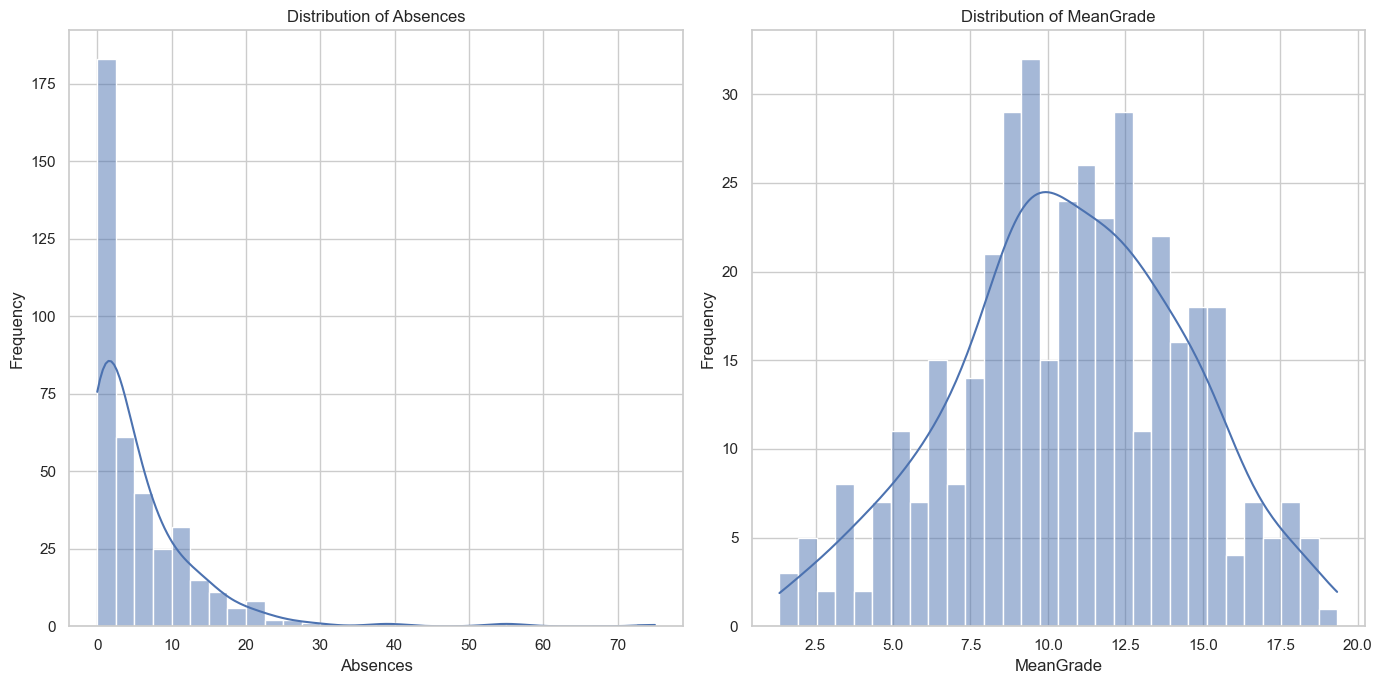

In [11]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for 'absences' and 'MeanGrade' to see the distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Histogram for 'absences'
sns.histplot(student_data_processed['absences'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Absences')
ax[0].set_xlabel('Absences')
ax[0].set_ylabel('Frequency')

# Histogram for 'MeanGrade'
sns.histplot(student_data_processed['MeanGrade'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of MeanGrade')
ax[1].set_xlabel('MeanGrade')
ax[1].set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

In [12]:
# Calculate statistics for 'absences'
absences_mean = student_data_processed['absences'].mean()
absences_median = student_data_processed['absences'].median()
absences_mode = student_data_processed['absences'].mode()[0]  # Mode can have multiple values; taking the first one
absences_range = student_data_processed['absences'].max() - student_data_processed['absences'].min()
absences_variance = student_data_processed['absences'].var()
absences_std_dev = student_data_processed['absences'].std()
absences_iqr = np.percentile(student_data_processed['absences'], 75) - np.percentile(student_data_processed['absences'], 25)

# Calculate statistics for 'MeanGrade'
mean_grade_mean = student_data_processed['MeanGrade'].mean()
mean_grade_median = student_data_processed['MeanGrade'].median()
mean_grade_mode = student_data_processed['MeanGrade'].mode()[0]  # Mode can have multiple values; taking the first one
mean_grade_range = student_data_processed['MeanGrade'].max() - student_data_processed['MeanGrade'].min()
mean_grade_variance = student_data_processed['MeanGrade'].var()
mean_grade_std_dev = student_data_processed['MeanGrade'].std()
mean_grade_iqr = np.percentile(student_data_processed['MeanGrade'], 75) - np.percentile(student_data_processed['MeanGrade'], 25)

print(f"Absences - Mean: {absences_mean}, Median: {absences_median}, Mode: {absences_mode}, Range: {absences_range}, Variance: {absences_variance}, Standard Deviation: {absences_std_dev}, Interquartile Range: {absences_iqr}")
print(f"MeanGrade - Mean: {mean_grade_mean}, Median: {mean_grade_median}, Mode: {mean_grade_mode}, Range: {mean_grade_range}, Variance: {mean_grade_variance}, Standard Deviation: {mean_grade_std_dev}, Interquartile Range: {mean_grade_iqr}")

Absences - Mean: 5.708860759493671, Median: 4.0, Mode: 0.0, Range: 75.0, Variance: 64.04954057700957, Standard Deviation: 8.00309568710818, Interquartile Range: 8.0
MeanGrade - Mean: 10.67932489451477, Median: 10.666666666666666, Mode: 9.0, Range: 18.0, Variance: 13.66622402136121, Standard Deviation: 3.6967856336770746, Interquartile Range: 5.0


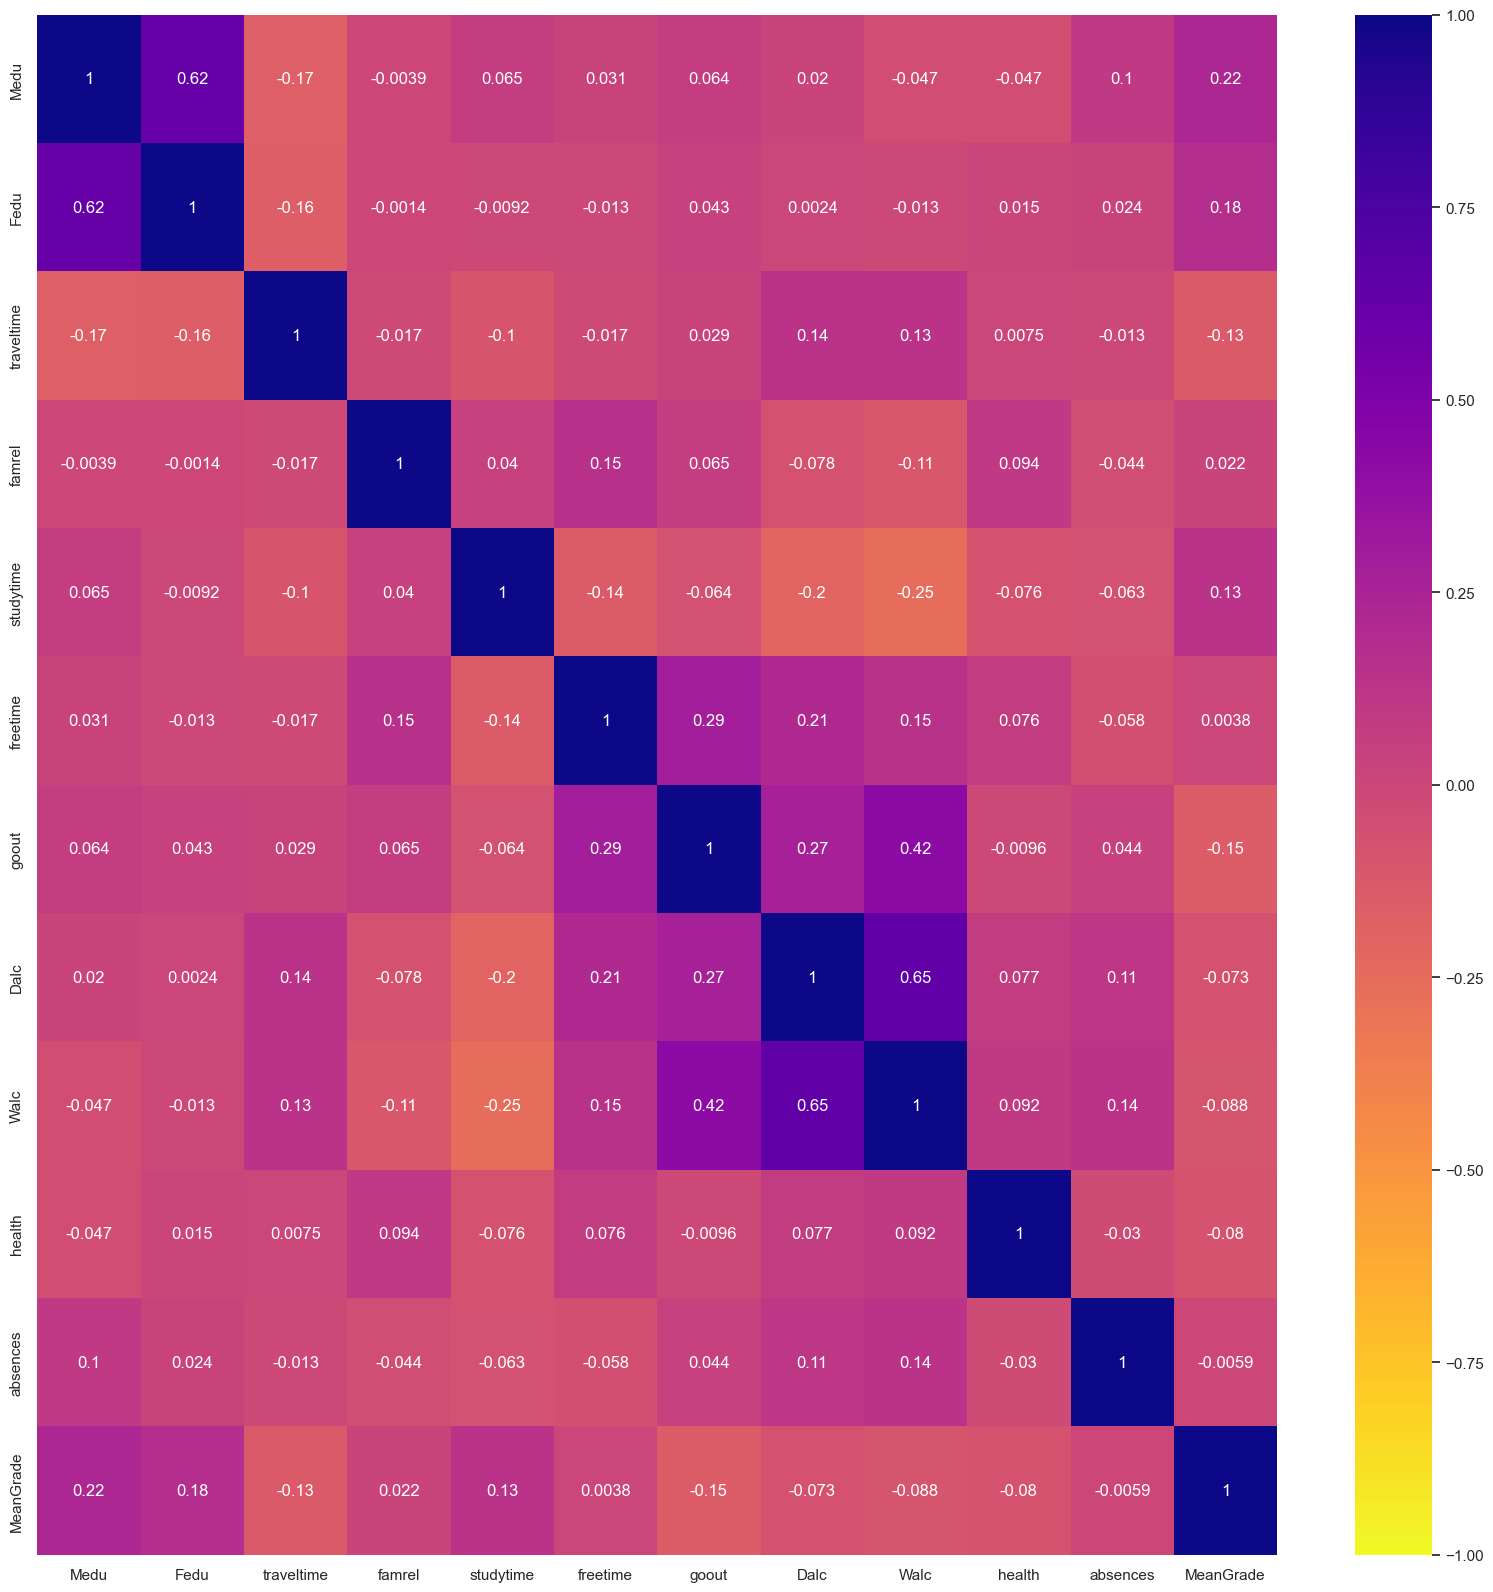

In [13]:
# Select only numeric columns for correlation calculation
numeric_cols = student_data_processed.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), vmin=-1, cmap="plasma_r", annot=True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


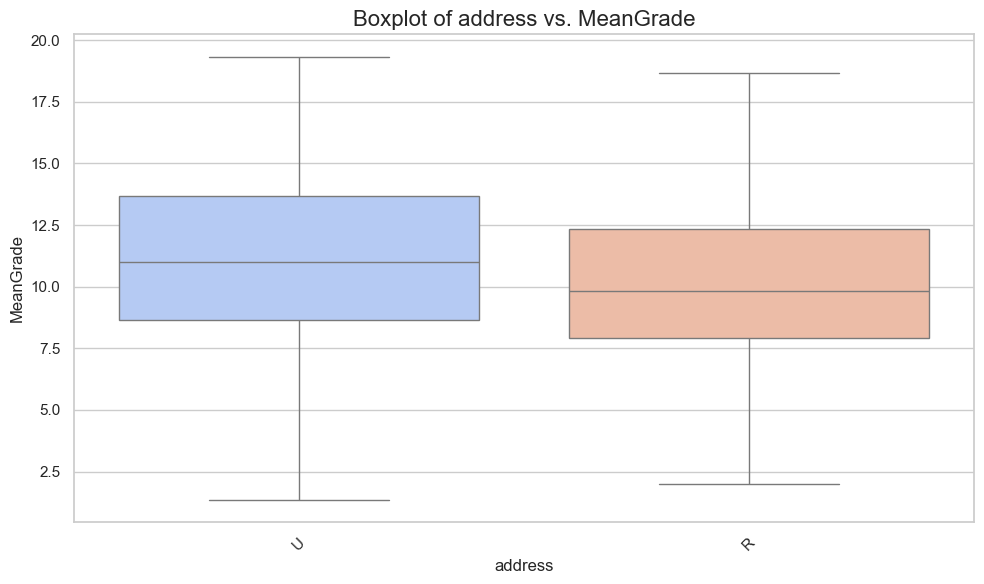

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


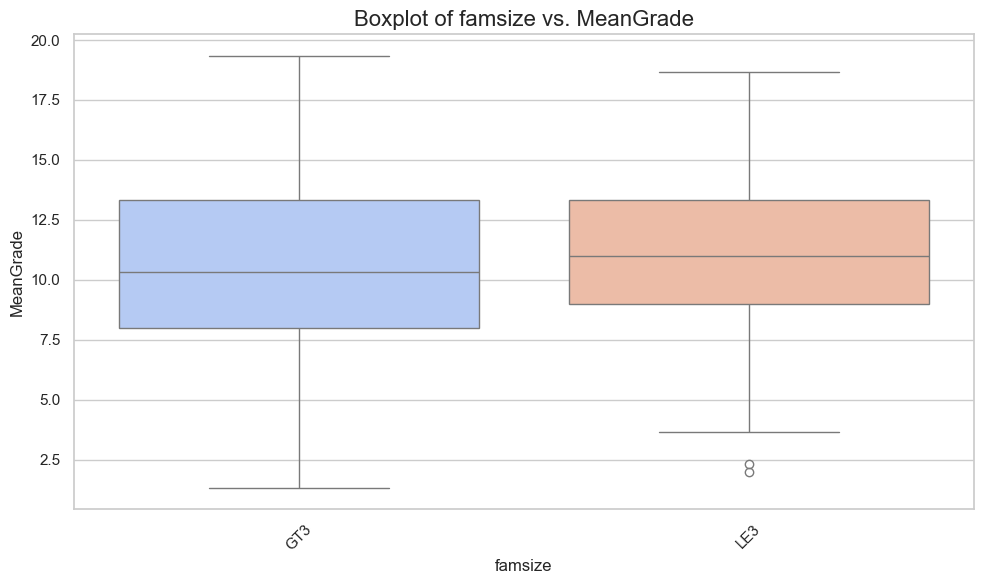

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


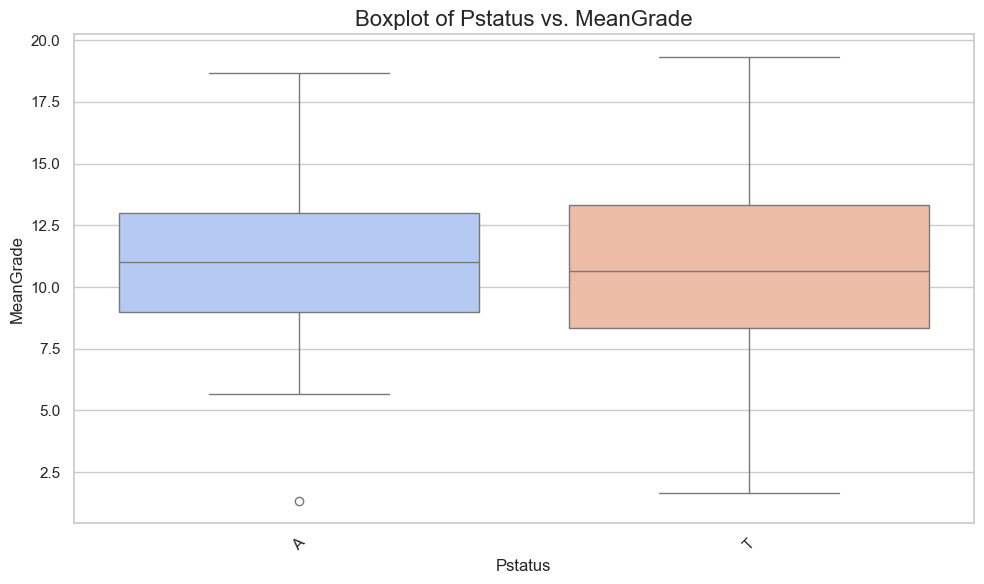

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


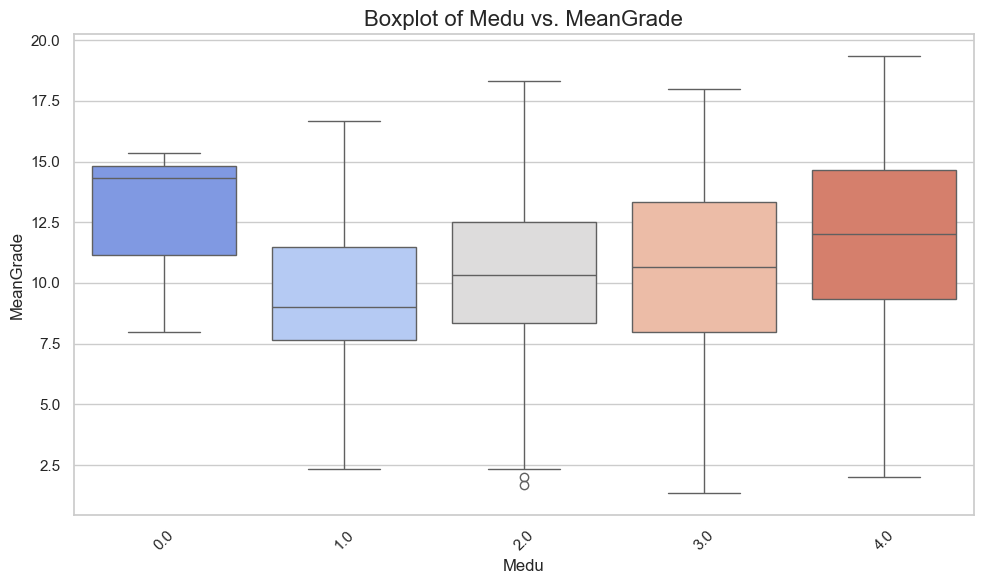

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


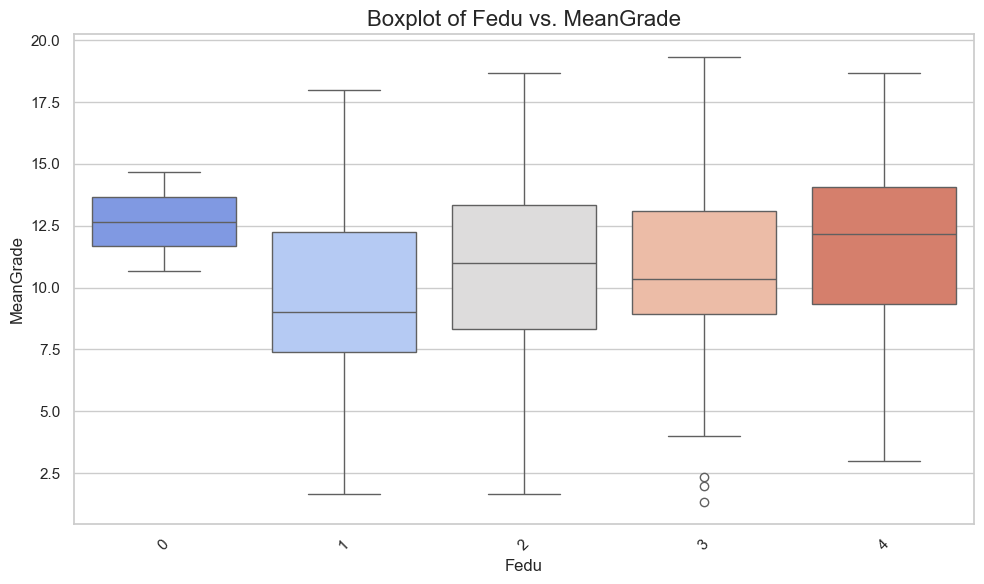

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


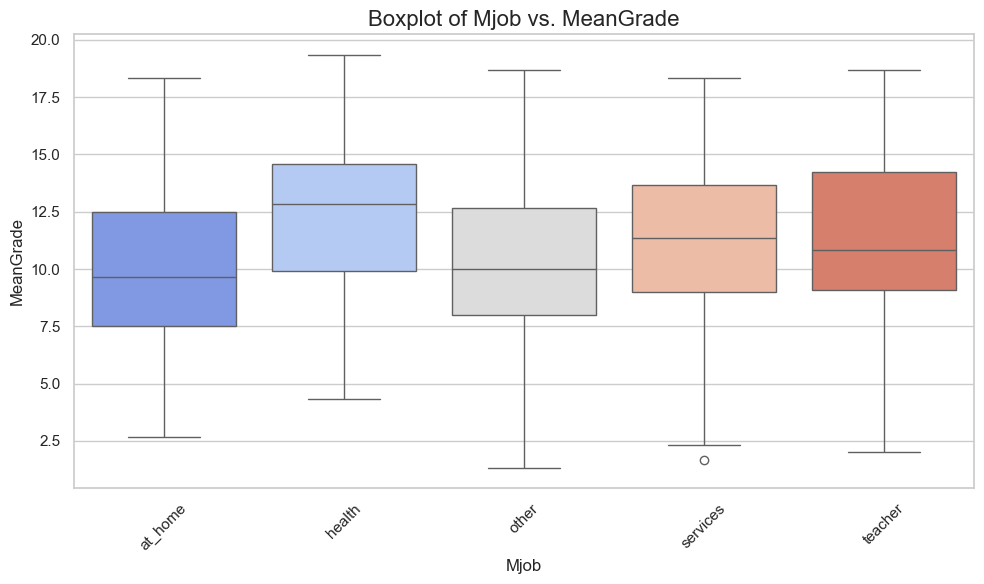

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


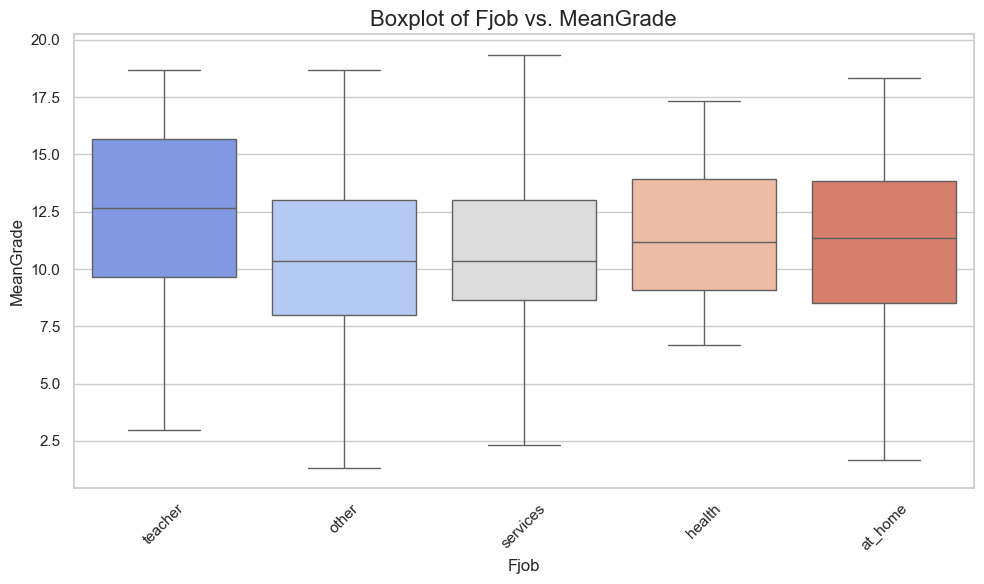

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


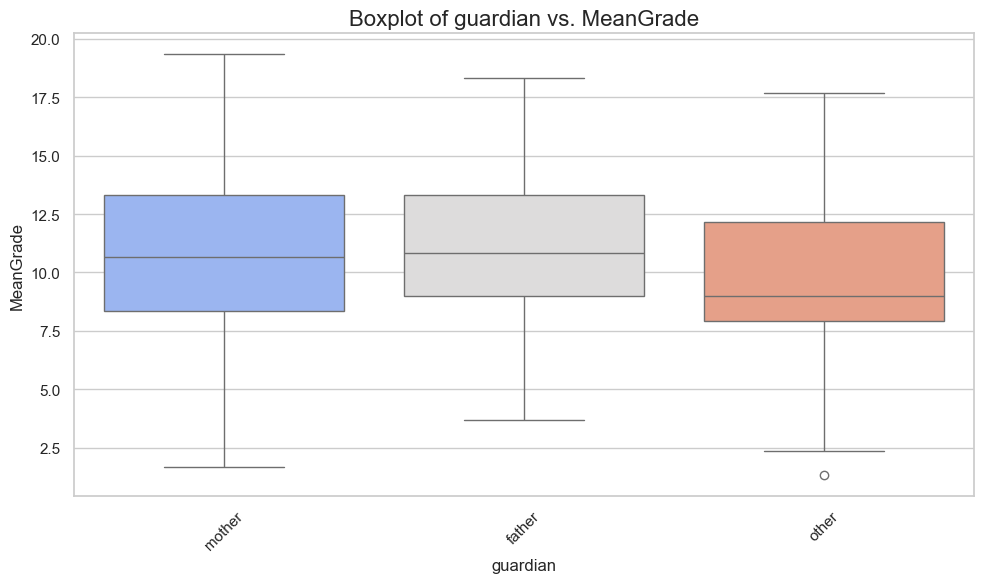

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


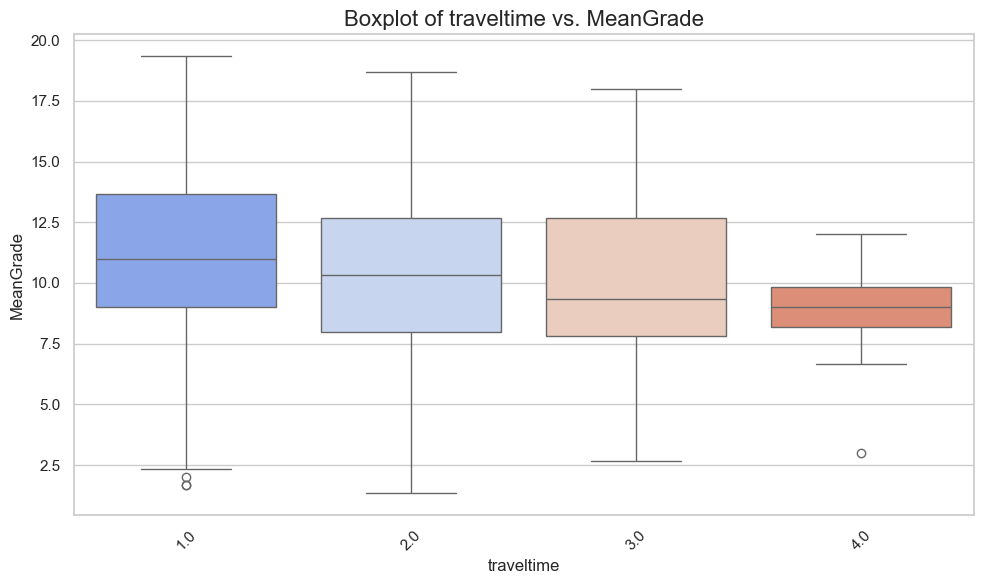

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


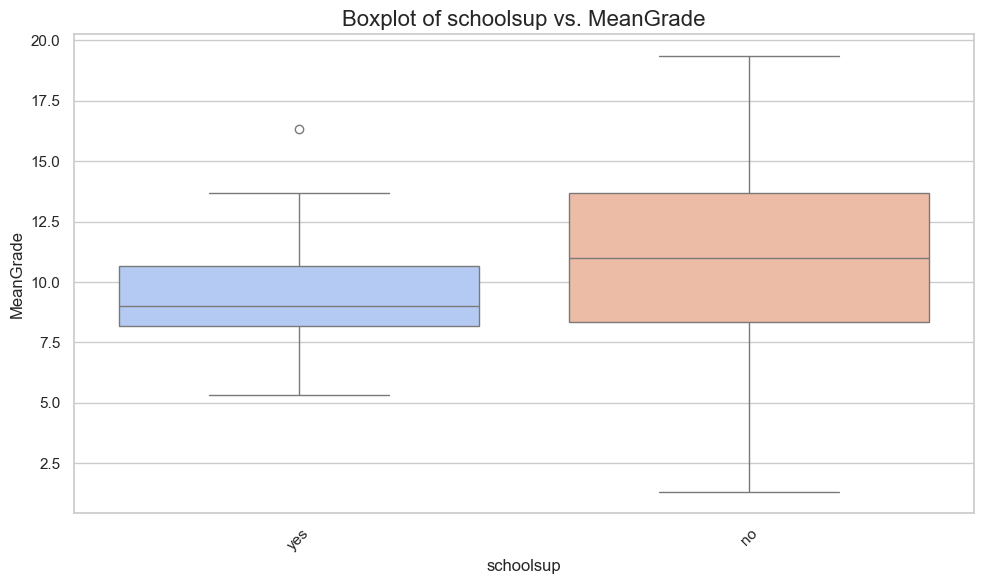

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


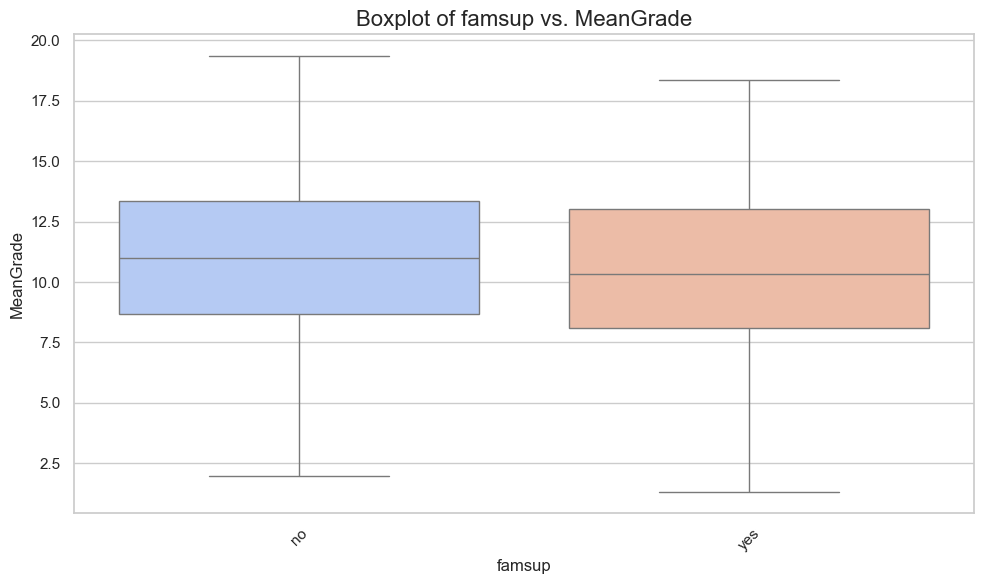

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


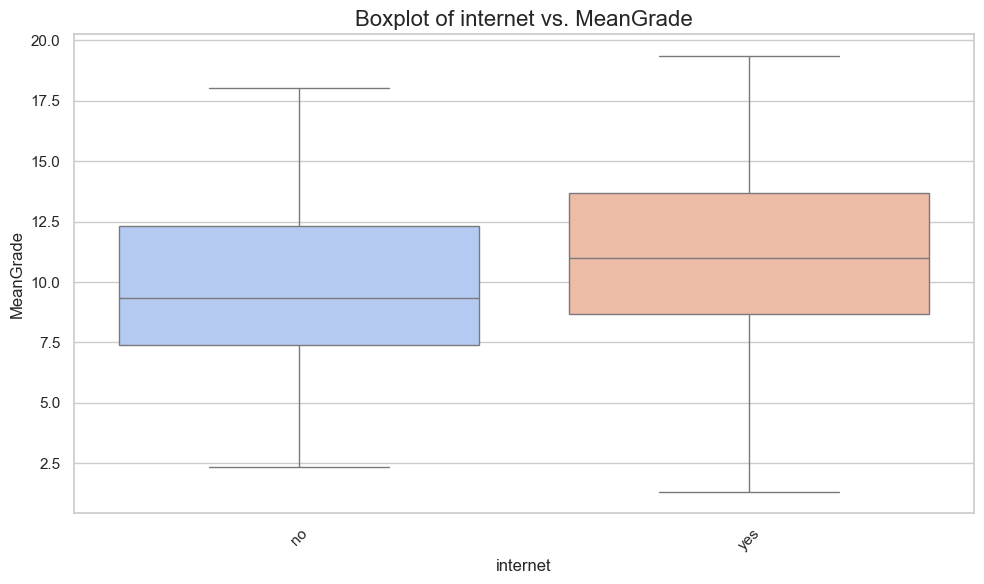

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


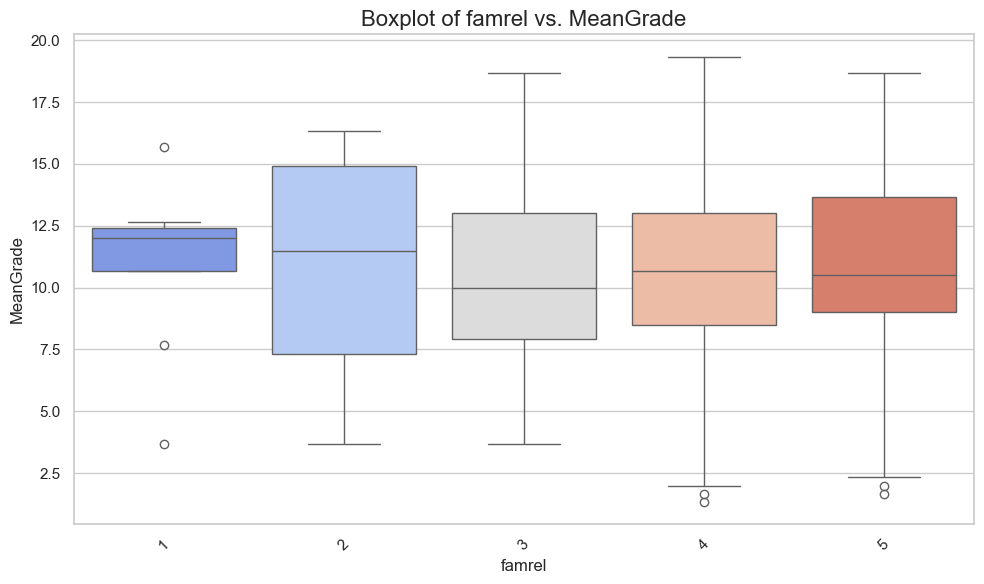

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


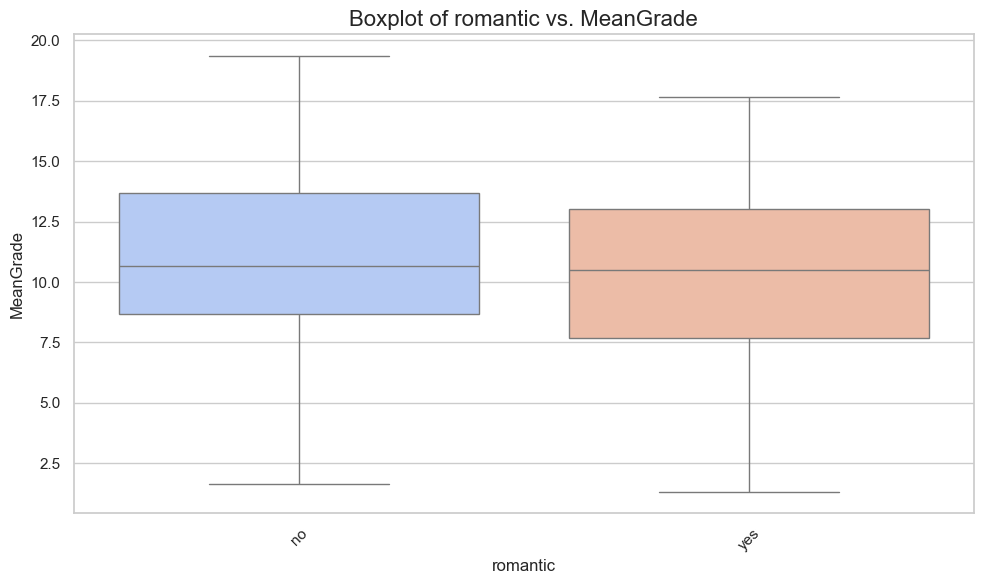

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


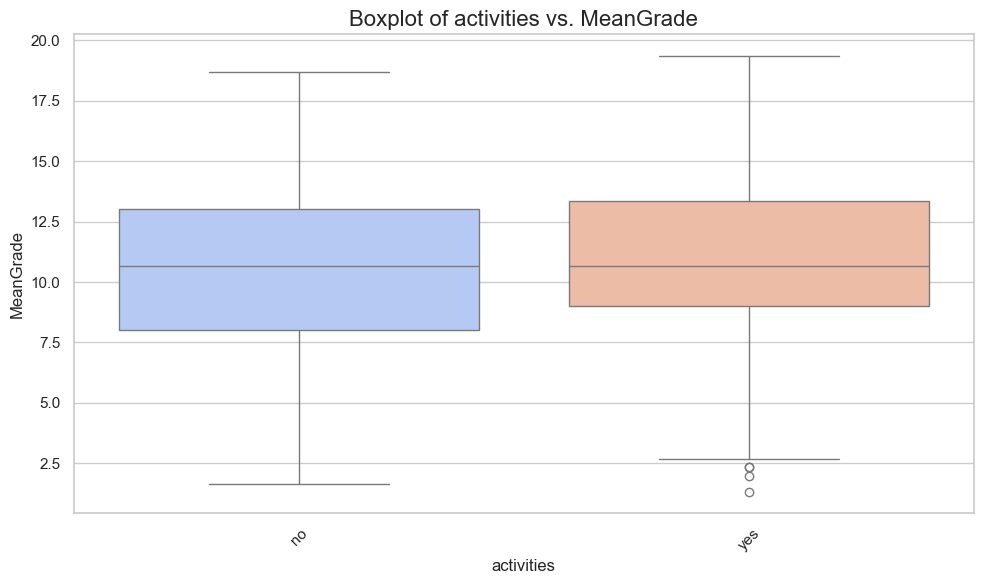

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


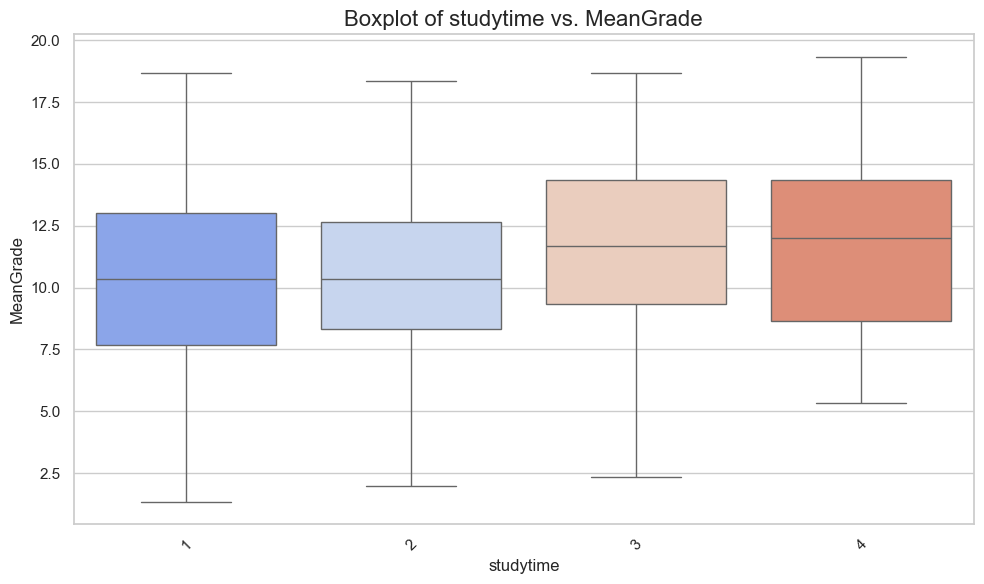

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


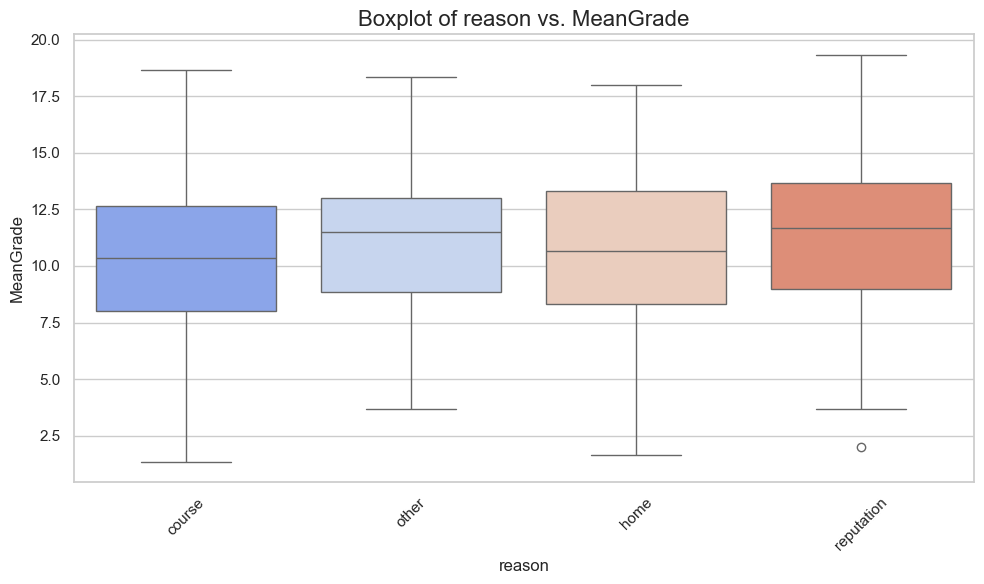

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


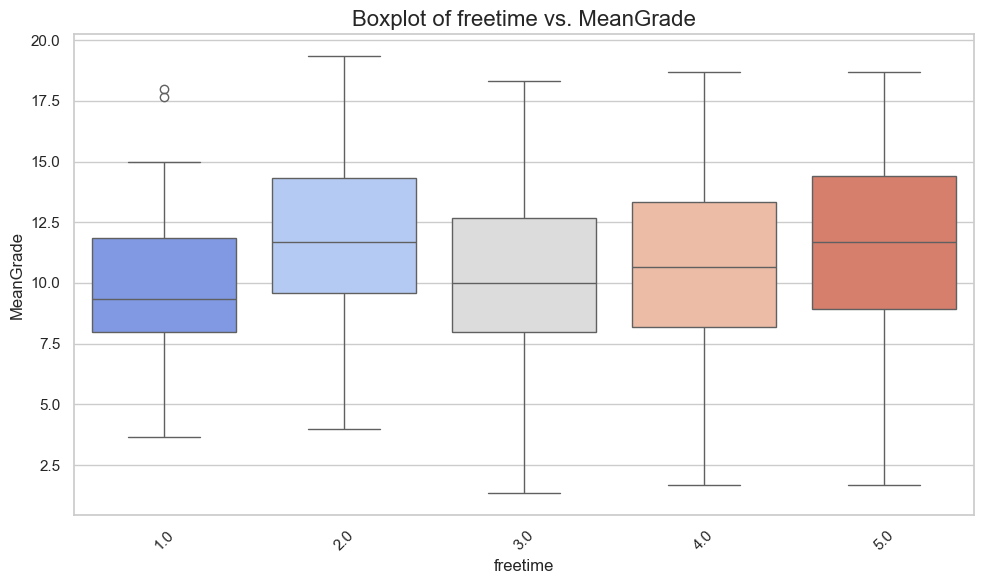

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


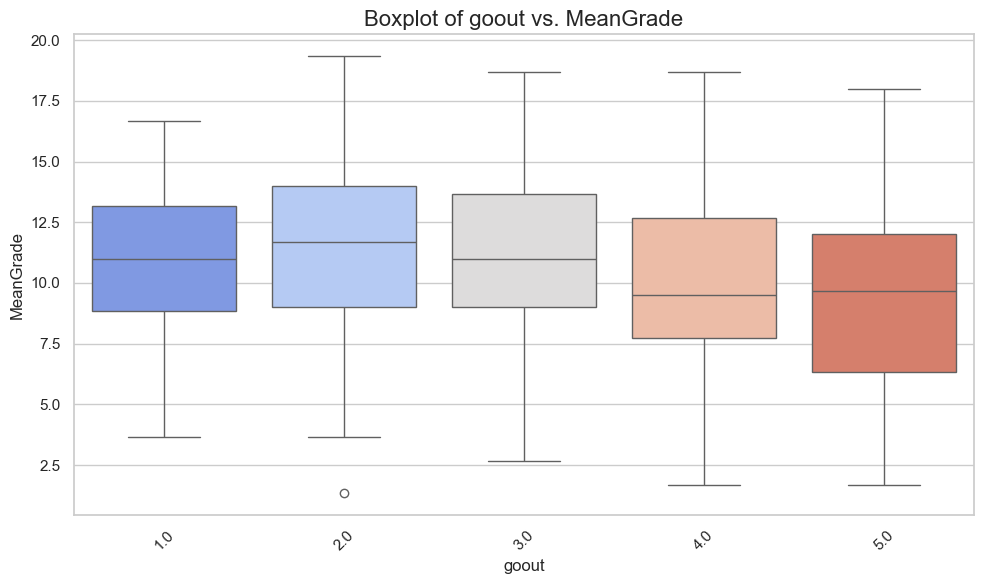

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


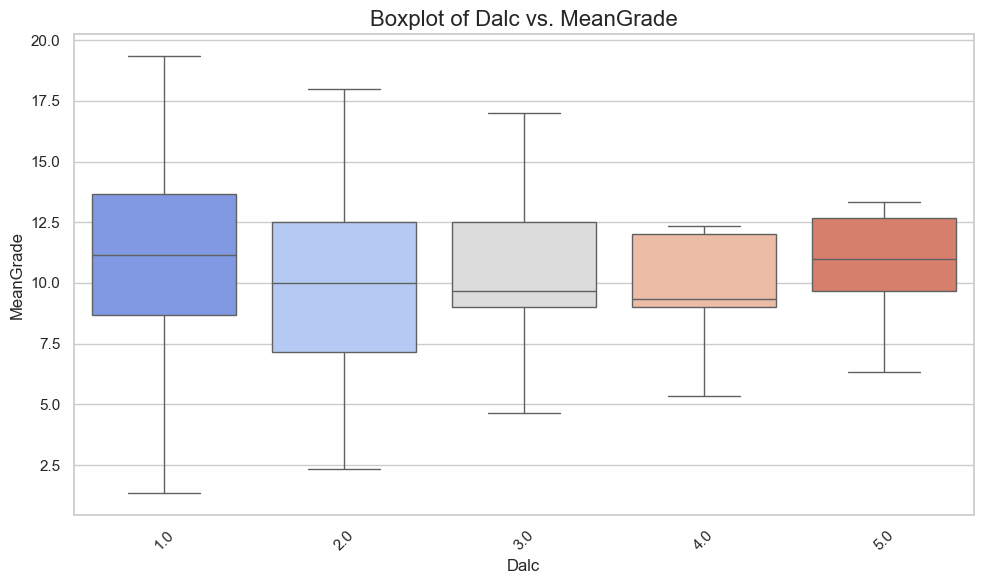

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


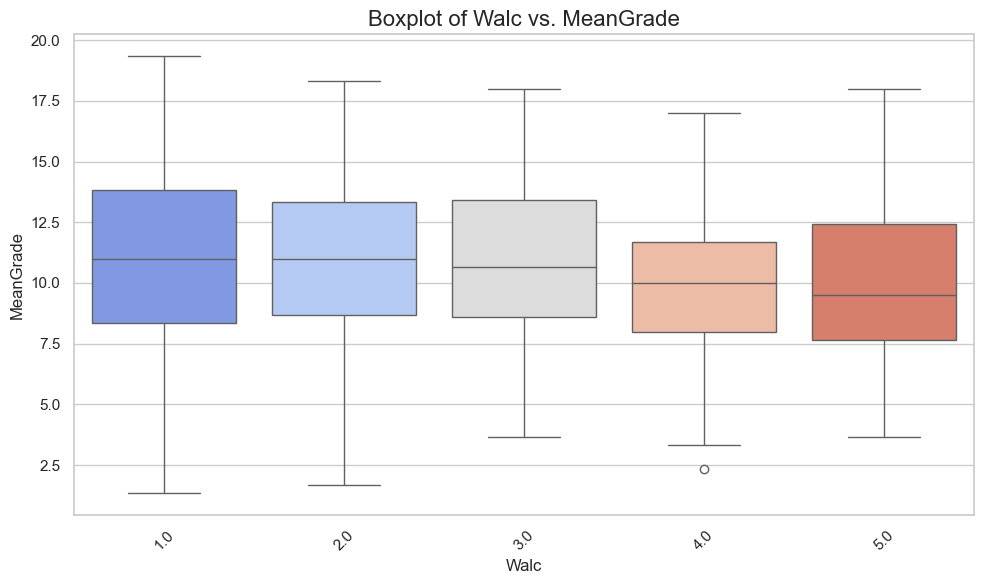

C:\Users\Admin\AppData\Local\Temp\ipykernel_19780\2426758892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot


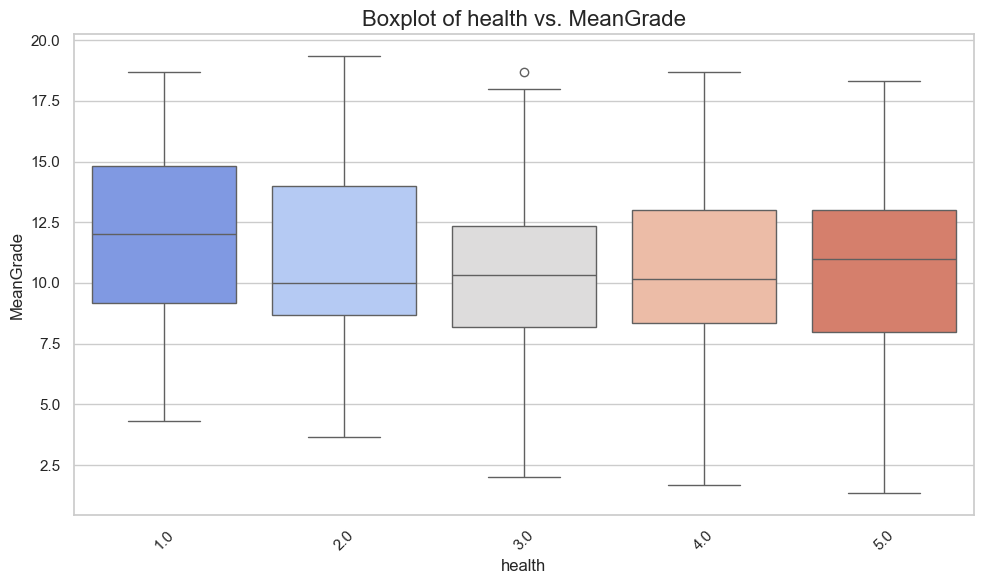

In [15]:
sns.set_style('whitegrid')

factors = student_data_processed.columns.drop(['school', 'absences', 'MeanGrade'])
i = 2
for factor in factors:
    plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
    sns.boxplot(x=factor, y='MeanGrade', data=student_data_processed, palette='coolwarm')  # Use Seaborn for a better-looking plot
    
    plt.title(f'Boxplot of {factor} vs. MeanGrade', fontsize=16)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel('MeanGrade', fontsize=12)
    
    plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
    plt.tight_layout()  # Adjust spacing to prevent clipping of tick-labels
    plt.savefig(f'outcome{i}')

    plt.show()
    i += 1

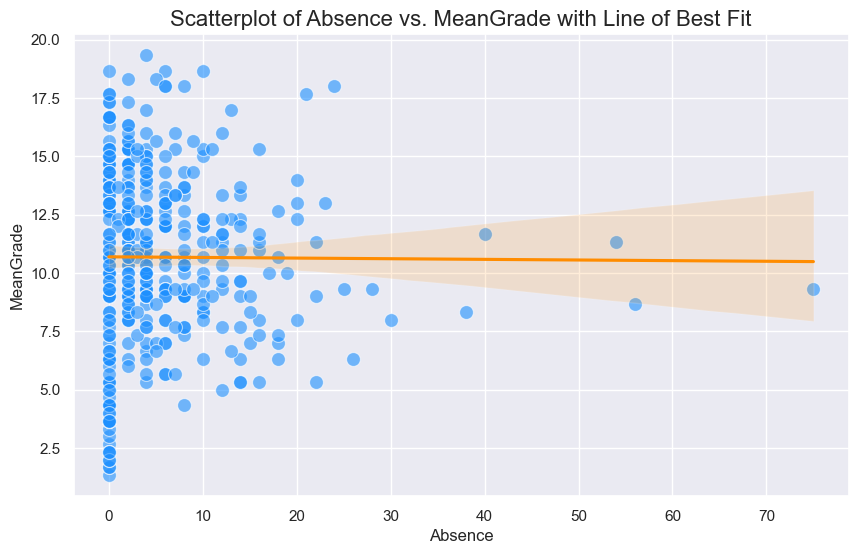

-0.005908806132303039


In [29]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='MeanGrade', data=student_data_processed, alpha=0.6, s=100, color='dodgerblue')

sns.regplot(x='absences', y='MeanGrade', data=student_data_processed, scatter=False, color='darkorange')

plt.title('Scatterplot of Absence vs. MeanGrade with Line of Best Fit', fontsize=16)
plt.xlabel('Absence', fontsize=12)
plt.ylabel('MeanGrade', fontsize=12)
plt.show()

correlation = student_data_processed['absences'].corr(student_data_processed['MeanGrade'])
print(correlation)

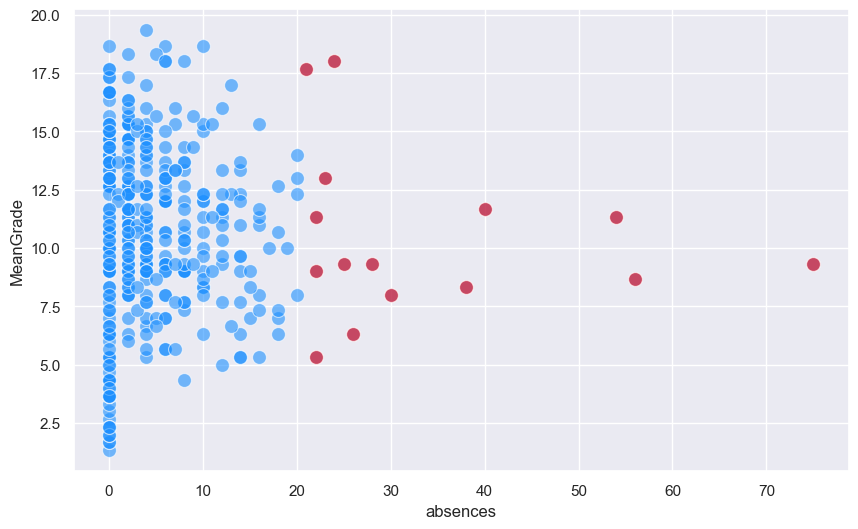

In [20]:
sns.set_style('darkgrid')

Q1 = student_data_processed['absences'].quantile(0.25)
Q3 = student_data_processed['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = student_data_processed[(student_data_processed['absences'] > upper_bound) | (student_data_processed['absences'] < lower_bound)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='MeanGrade', data=student_data_processed, alpha=0.6, s=100, color='dodgerblue')
sns.scatterplot(x='absences', y='MeanGrade', data=outliers, alpha=0.6, s=100, color='red')
plt.show()


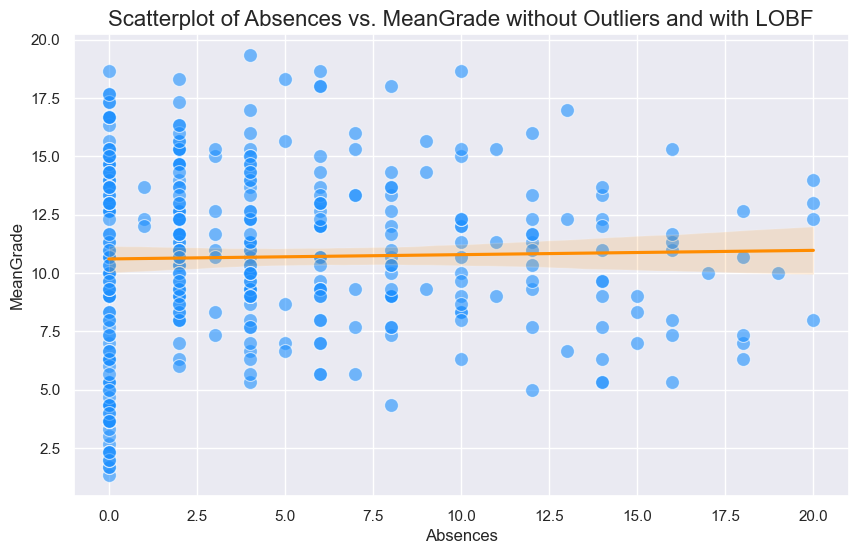

In [23]:
sns.set_style('darkgrid')

# Calculate the IQR and determine the bounds for outliers
Q1 = student_data_processed['absences'].quantile(0.25)
Q3 = student_data_processed['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
non_outliers = student_data_processed[
    (student_data_processed['absences'] <= upper_bound) &
    (student_data_processed['absences'] >= lower_bound)]

plt.figure(figsize=(10, 6))

# Plot the scatterplot for non-outliers
sns.scatterplot(x='absences', y='MeanGrade', data=non_outliers, alpha=0.6, s=100, color='dodgerblue')

# Add a line of best fit for non-outliers
sns.regplot(x='absences', y='MeanGrade', data=non_outliers, scatter=False, color='darkorange')

plt.title('Scatterplot of Absences vs. MeanGrade without Outliers and with LOBF', fontsize=16)
plt.xlabel('Absences', fontsize=12)
plt.ylabel('MeanGrade', fontsize=12)

plt.show()


In [31]:
sample_mean = student_data_processed['MeanGrade'].mean()
sample_std = student_data_processed['MeanGrade'].std()
sample_size = student_data_processed['MeanGrade'].count()

print(sample_mean, sample_std, sample_size)

10.67932489451477 3.6967856336770746 395


In [33]:
population_mean = 10

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Calculate the degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_statistic), degrees_of_freedom) * 2  # two-tailed test

print(t_statistic, p_value)

3.652176940588574 0.0002951384335081827


In [39]:
# Two-sample t-test comparing the mean

# Extracting the relevant data for the t-test from the dataset
mean_a = student_data_processed['MeanGrade'][student_data_processed['absences'] <= 7].mean()
std_a = student_data_processed['MeanGrade'][student_data_processed['absences'] <= 7].std()
n_a = student_data_processed['MeanGrade'][student_data_processed['absences'] <= 7].count()

mean_b = student_data_processed['MeanGrade'][student_data_processed['absences'] > 7].mean()
std_b = student_data_processed['MeanGrade'][student_data_processed['absences'] > 7].std()
n_b = student_data_processed['MeanGrade'][student_data_processed['absences'] > 7].count()

# Calculate the t-statistic and p-value for the two sample t-test
# The function ttest_ind already assumes unequal variances by default (Welch's t-test)
t_stat, p_value = stats.ttest_ind(student_data_processed['MeanGrade'][student_data_processed['absences'] <= 7],
                            student_data_processed['MeanGrade'][student_data_processed['absences'] > 7],
                            equal_var=False)

(mean_a, std_a, n_a), (mean_b, std_b, n_b), (t_stat, p_value)

((10.725900116144018, 3.9111110864991128, 287),
 (10.555555555555555, 3.0682780542298533, 108),
 (0.45450490609077154, 0.649869938503228))

In [27]:
# Calculating overall mean
overall_mean = student_data_processed['MeanGrade'].mean()

# Calculating Sum of Squares for Treatment (SSTr)
SSTr = sum(student_data_processed.groupby('school')['MeanGrade'].count() *
           (student_data_processed.groupby('school')['MeanGrade'].mean() - overall_mean)**2)

# Calculating Sum of Squares for Error (SSE) and Total Sum of Squares (SST)
SSE = sum((student_data_processed.groupby(['school', student_data_processed.index])['MeanGrade'].mean() - 
           student_data_processed.groupby('school')['MeanGrade'].mean())**2)
SST = sum((student_data_processed['MeanGrade'] - overall_mean)**2)

# Degrees of Freedom
unique_schools = student_data_processed['school'].unique()
df_tr = len(unique_schools) - 1  # k - 1
df_e = student_data_processed.shape[0] - len(unique_schools)  # kn - k
df_total = student_data_processed.shape[0] - 1  # kn - 1

# Mean Squares
MSTr = SSTr / df_tr
MSE = SSE / df_e

# Computed F
F_computed = MSTr / MSE

SSTr, SSE, SST, MSTr, MSE, df_tr, df_e, F_computed


(63.58399281137693,
 5320.908271604938,
 5384.492264416309,
 21.194664270458976,
 13.60846105269805,
 3,
 391,
 1.5574622426726836)